# Section Extraction

Documents are often organized into logical sections like chapters, articles, or content blocks. This tutorial shows how to extract these sections using natural-pdf, using a library weeding log as an example.

In [1]:
#%pip install natural-pdf

CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


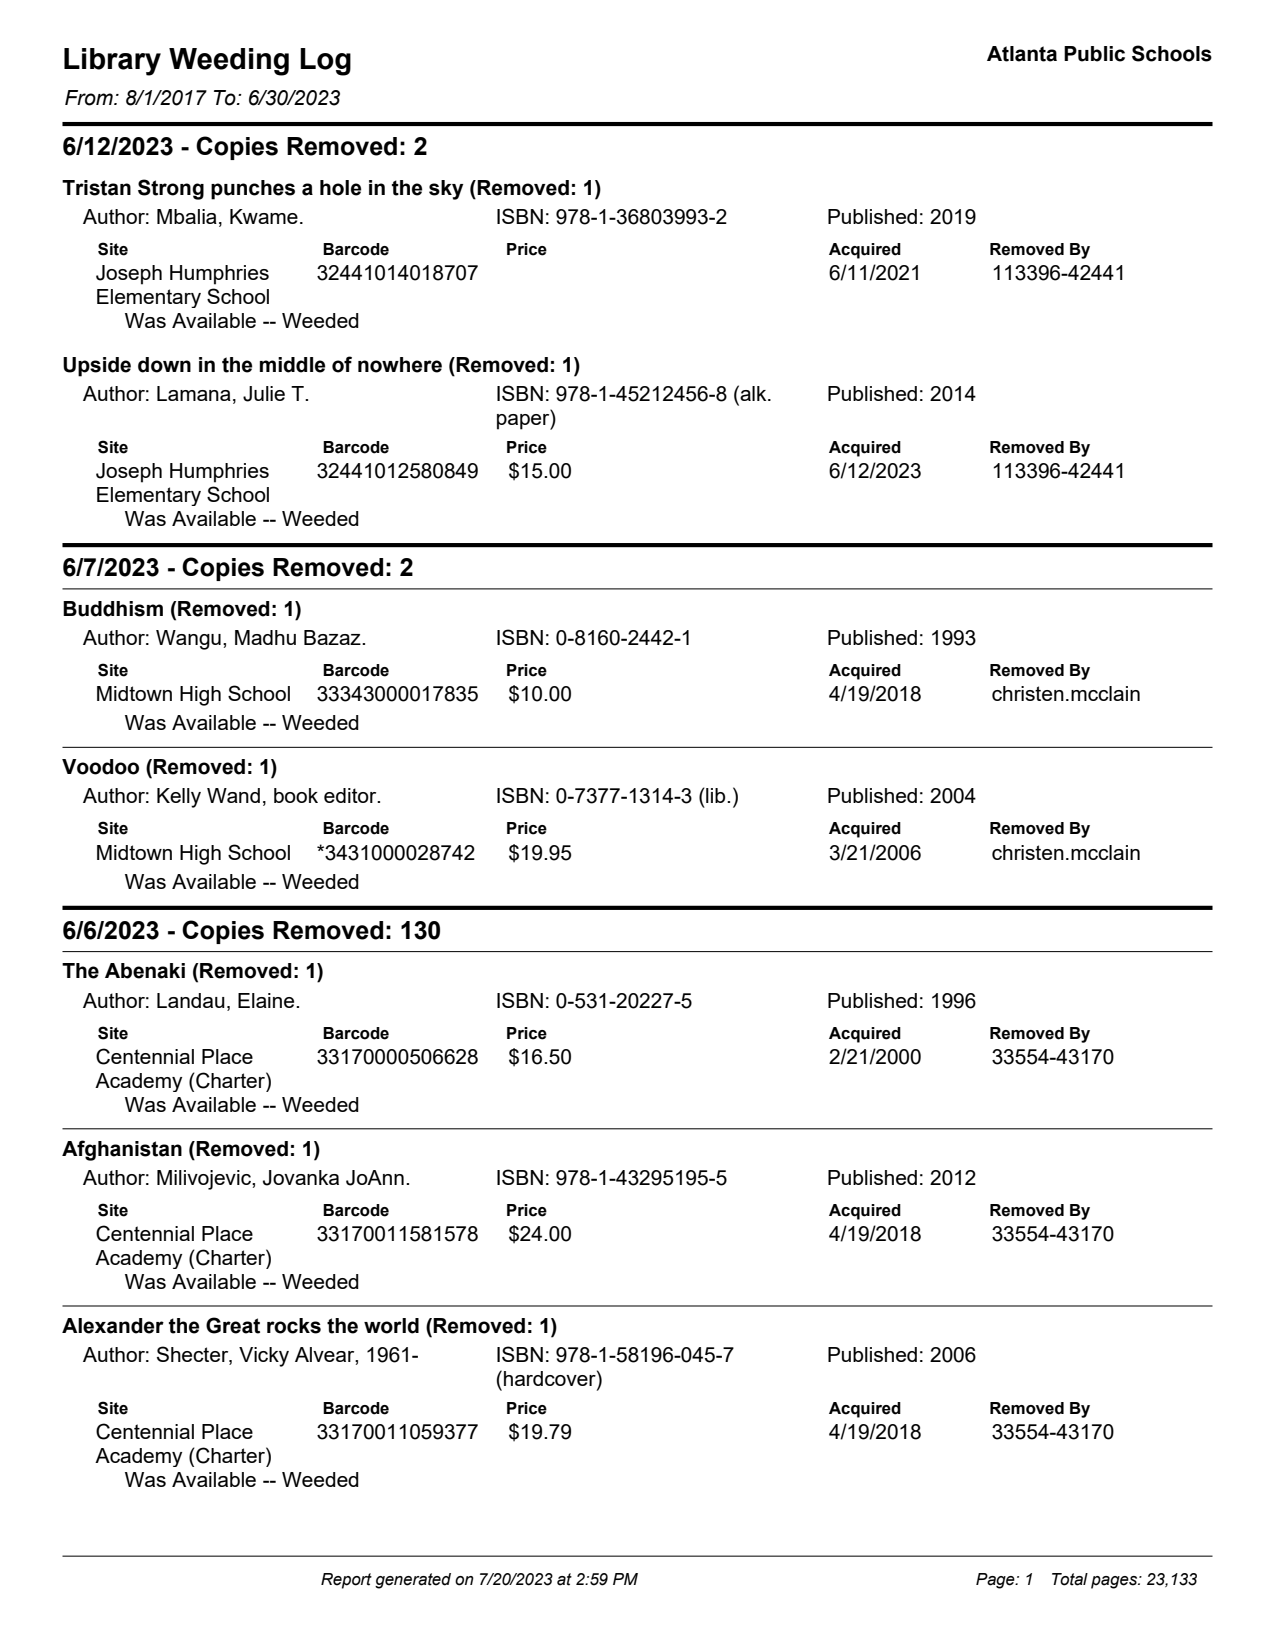

In [2]:
from natural_pdf import PDF

# Load the PDF using the relative path
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/Atlanta_Public_Schools_GA_sample.pdf")
page = pdf.pages[0]

# Identify horizontal rules that look like section dividers
horizontal_lines = page.find_all('line:horizontal')

# Visualize the potential section boundaries (single element type ➜ use .show())
horizontal_lines.show(color="red", label="Section Boundaries")
page.show()

In [3]:
# Count what we found
len(horizontal_lines)

9

## Basic Section Extraction

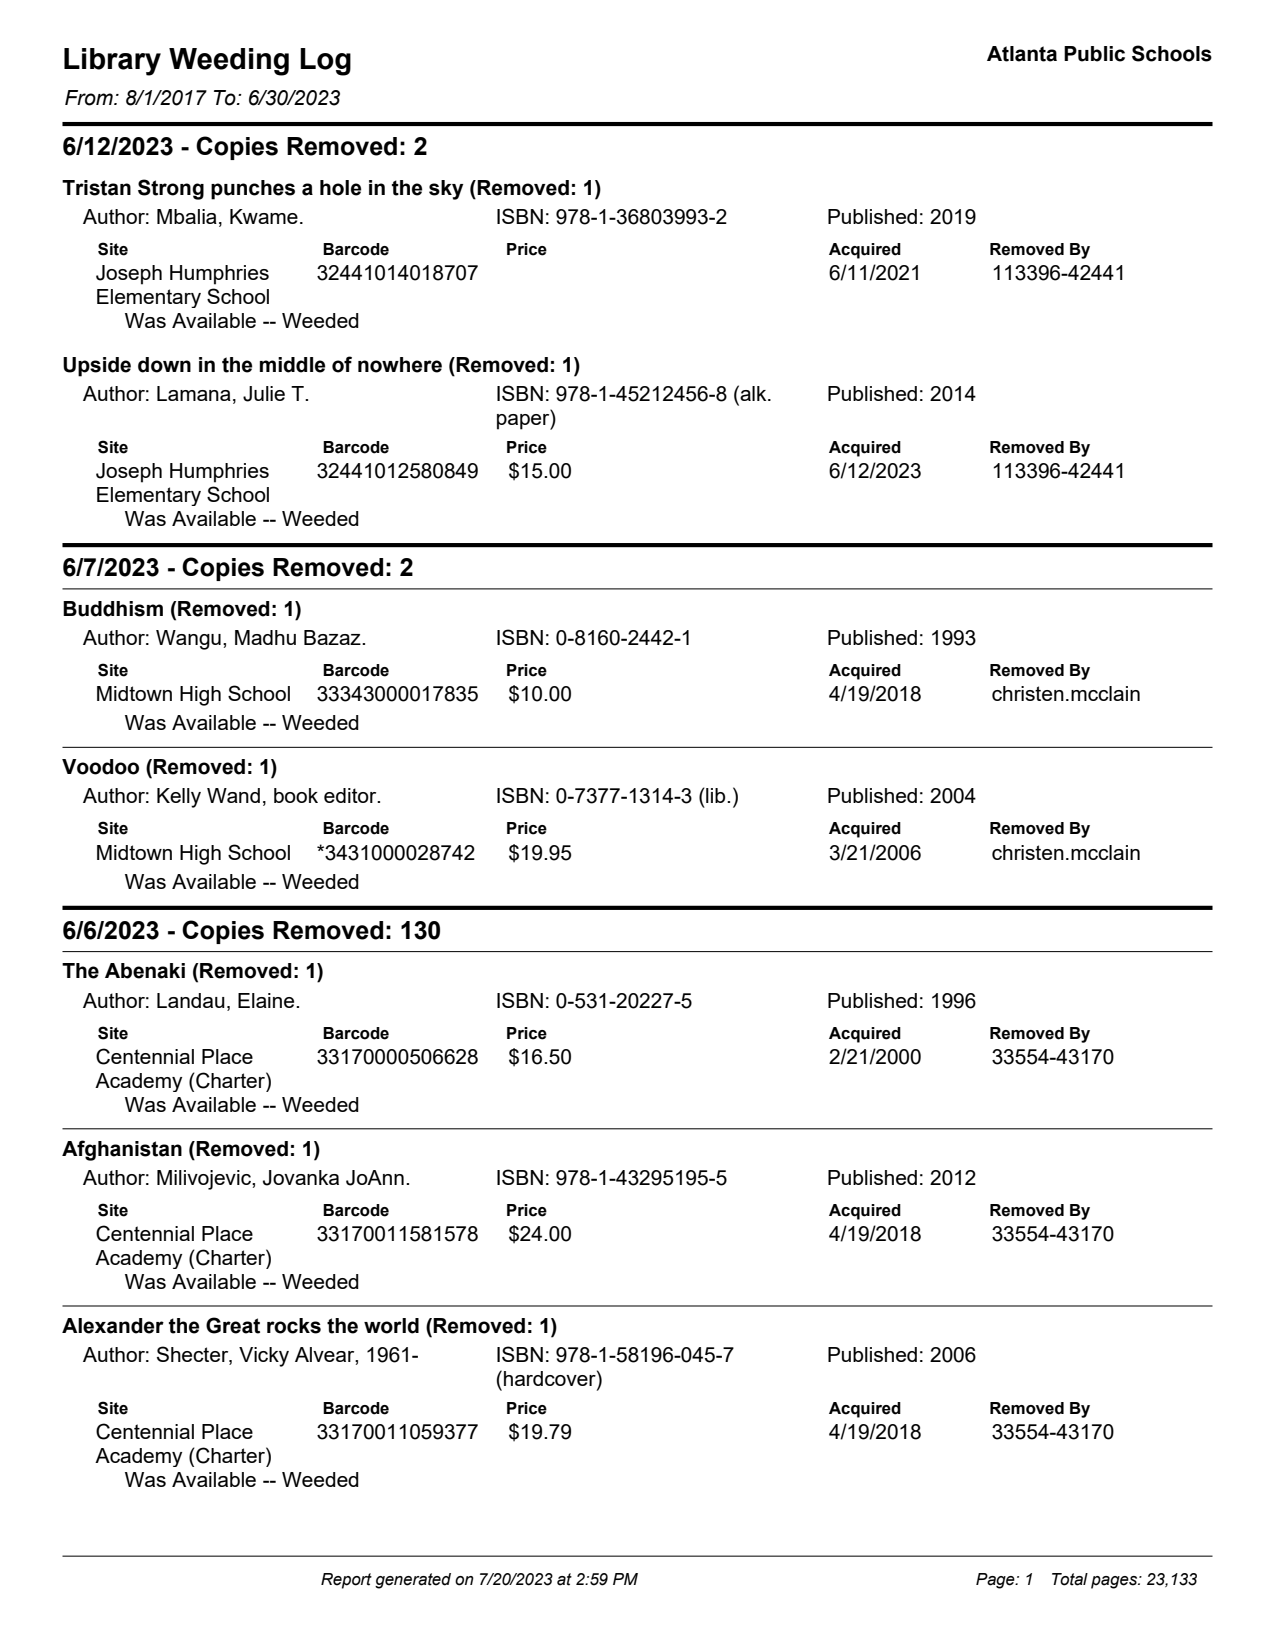

In [4]:
# Extract sections based on horizontal lines
# Each section starts at a horizontal line and ends at the next one
book_sections = page.get_sections(
    start_elements=horizontal_lines,
    include_boundaries='start'  # Include the boundary in the section
)

# Visualize each section
page.clear_highlights()
for section in book_sections:
    section.show()
page.show()

In [5]:
# Display section count and preview the first section
{
    "total_sections": len(book_sections),
    "first_section_text": book_sections[0].extract_text()[:100] + "..." if book_sections else "No sections found"
}

{'total_sections': 9,
 'first_section_text': '6/12/2023 - Copies Removed: 2\nTristan Strong punches a hole in the sky (Removed: 1)\nAuthor: Mbalia, ...'}

## Working with Section Content

In [6]:
# Extract and display content from the first few book entries
book_entries = []

for i, section in enumerate(book_sections[:5]):
    # Extract the section text
    text = section.extract_text().strip()

    # Try to parse book information
    title = ""
    author = ""
    isbn = ""

    # Extract title (typically the first line)
    title_match = section.find('text:contains("Title:")')
    if title_match:
        title_value = title_match.right(width=400).extract_text()
        title = title_value.strip()

    # Extract author
    author_match = section.find('text:contains("Author:")')
    if author_match:
        author_value = author_match.right(width=400).extract_text()
        author = author_value.strip()

    # Extract ISBN
    isbn_match = section.find('text:contains("ISBN:")')
    if isbn_match:
        isbn_value = isbn_match.right(width=400).extract_text()
        isbn = isbn_value.strip()

    # Add to our collection
    book_entries.append({
        "number": i + 1,
        "title": title,
        "author": author,
        "isbn": isbn,
        "preview": text[:50] + "..." if len(text) > 50 else text
    })

# Display the structured book entries
import pandas as pd
pd.DataFrame(book_entries)

number title                                             author  \
0       1        Log Atlanta Public S\n023\nemoved: 2\na hole i...   
1       2                                                            
2       3        Atlanta Public School\nved: 2\nin the sky (Rem...   
3       4        Atlanta Public Schools\nd: 2\nn the sky (Remov...   
4       5                                                            

                                                isbn  \
0  Atlanta Public Schools\nPublished: 2019\nAcqui...   
1                                                      
2  Atlanta Public Schools\n93-2 Published: 2019\n...   
3  Atlanta Public Schools\nPublished: 2019\nAcqui...   
4                                                      

                                             preview  
0  6/12/2023 - Copies Removed: 2\nTristan Strong ...  
1                       6/7/2023 - Copies Removed: 2  
2  Buddhism (Removed: 1)\nAuthor: Wangu, Madhu Ba...  
3  Voodoo (Removed: 1)\nAuthor: Kelly Wand, book ...  
4                     6/6/2023 - Copies Removed: 130

## Using Different Section Boundaries


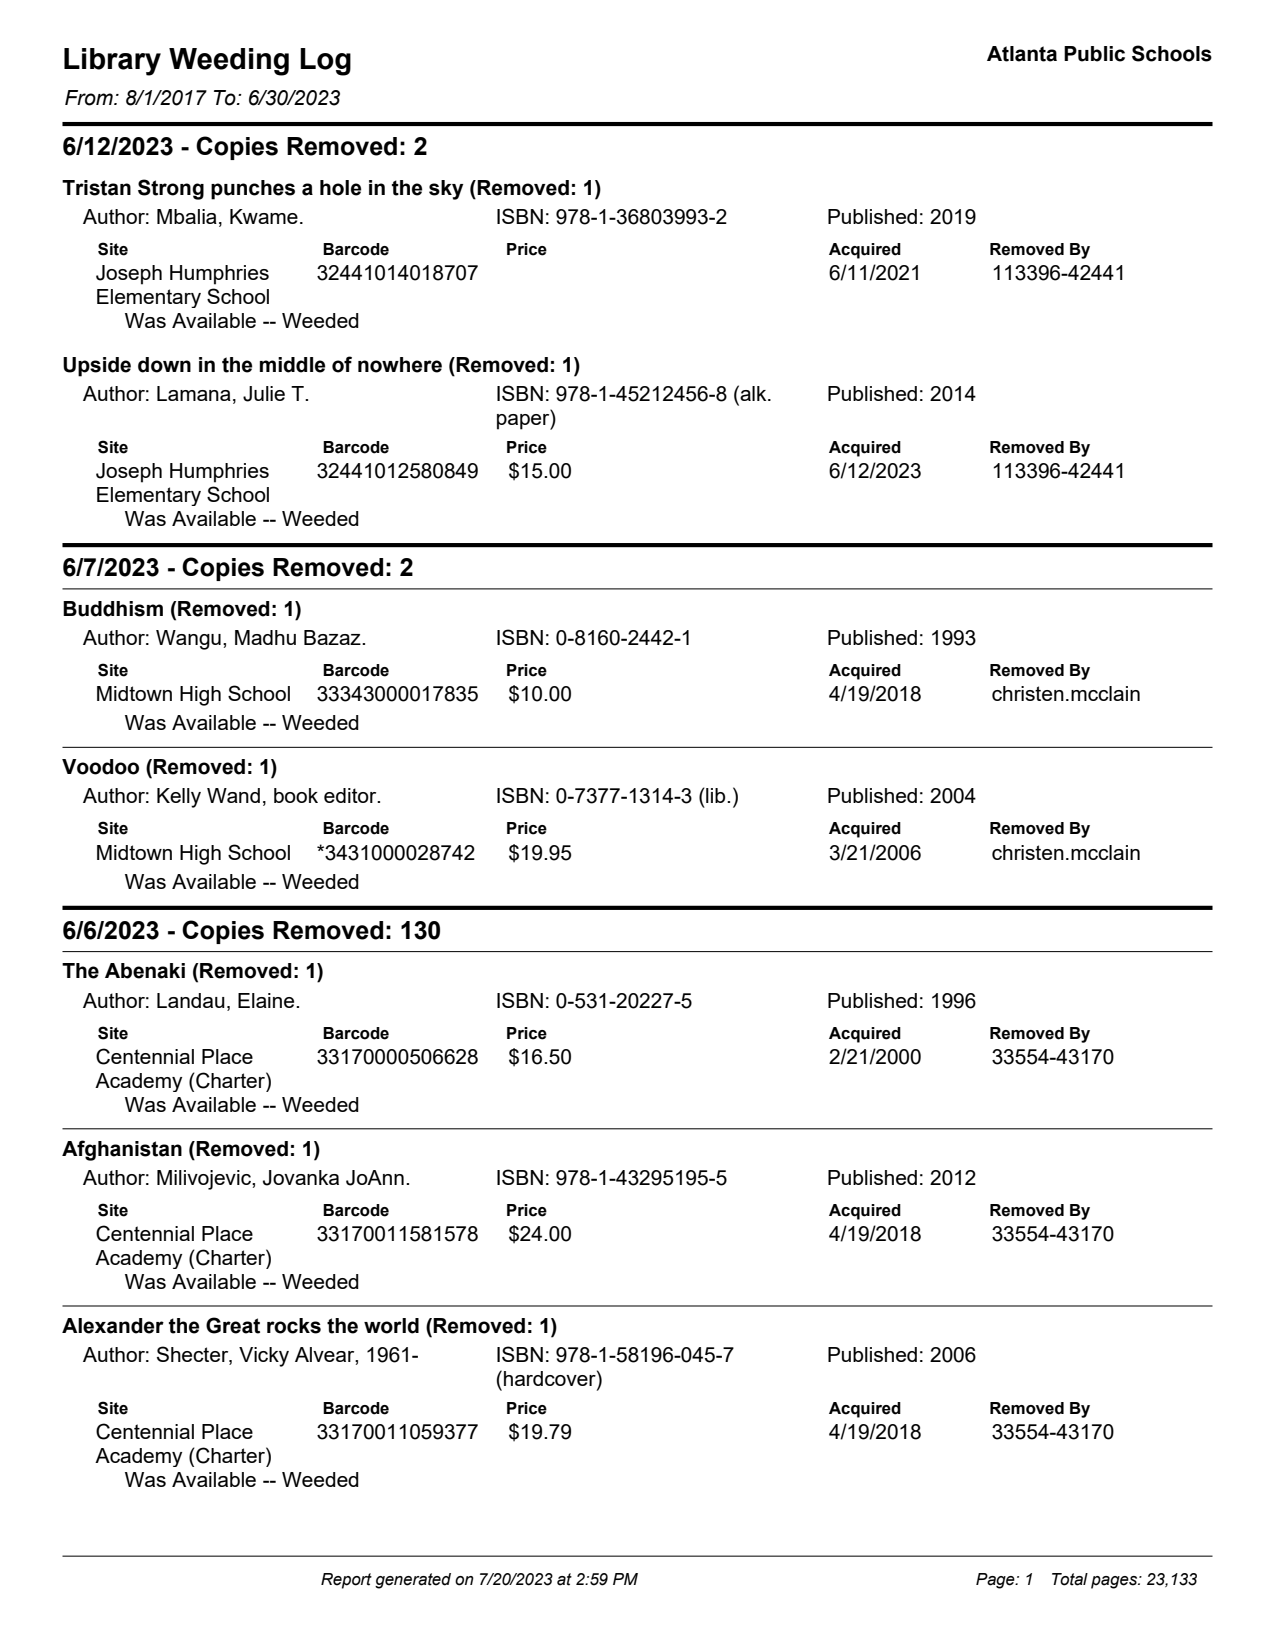

<IPython.core.display.Javascript object>

InteractiveViewerWidget()

In [7]:
page.viewer()

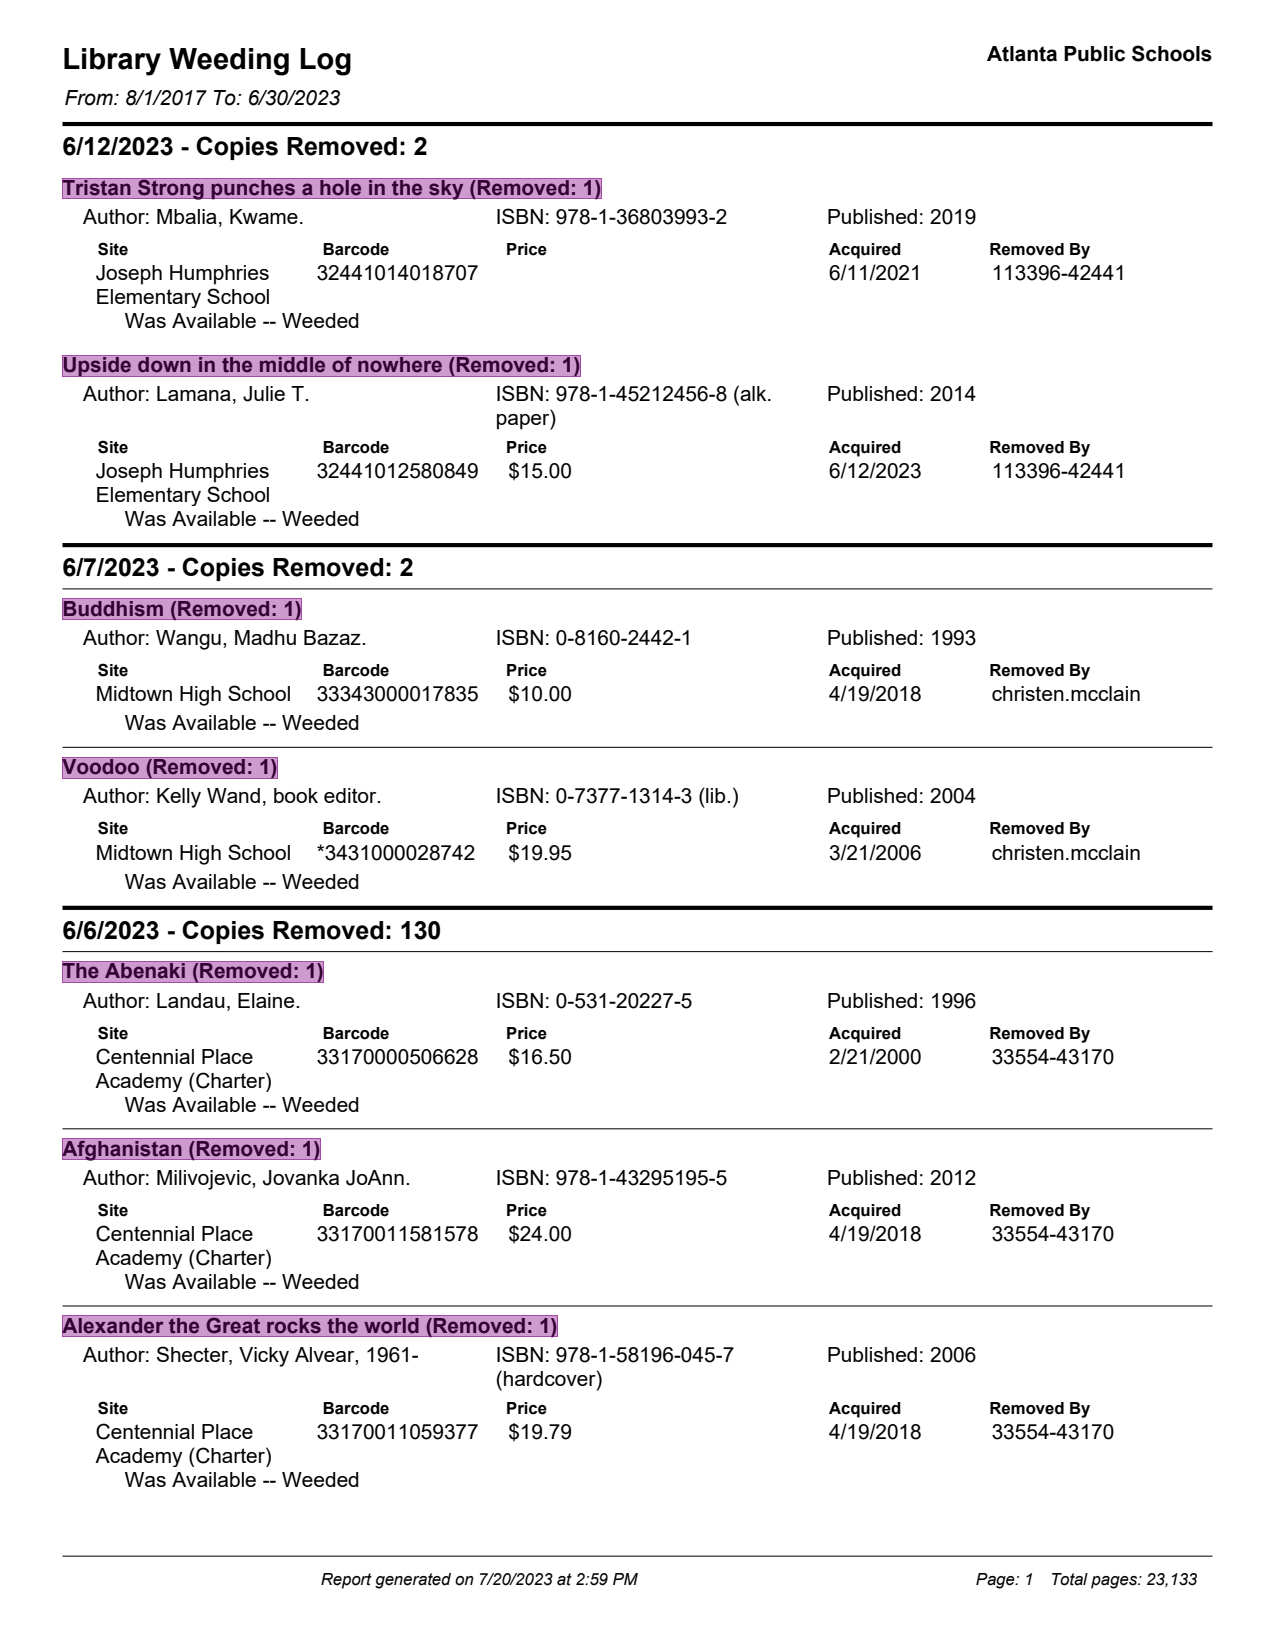

In [8]:
# Find title elements with specific selectors
title_elements = page.find('line[width=2]').below().find_all('text[fontname="AAAAAB+font000000002a8d158a"][size=10]')
title_elements.show()

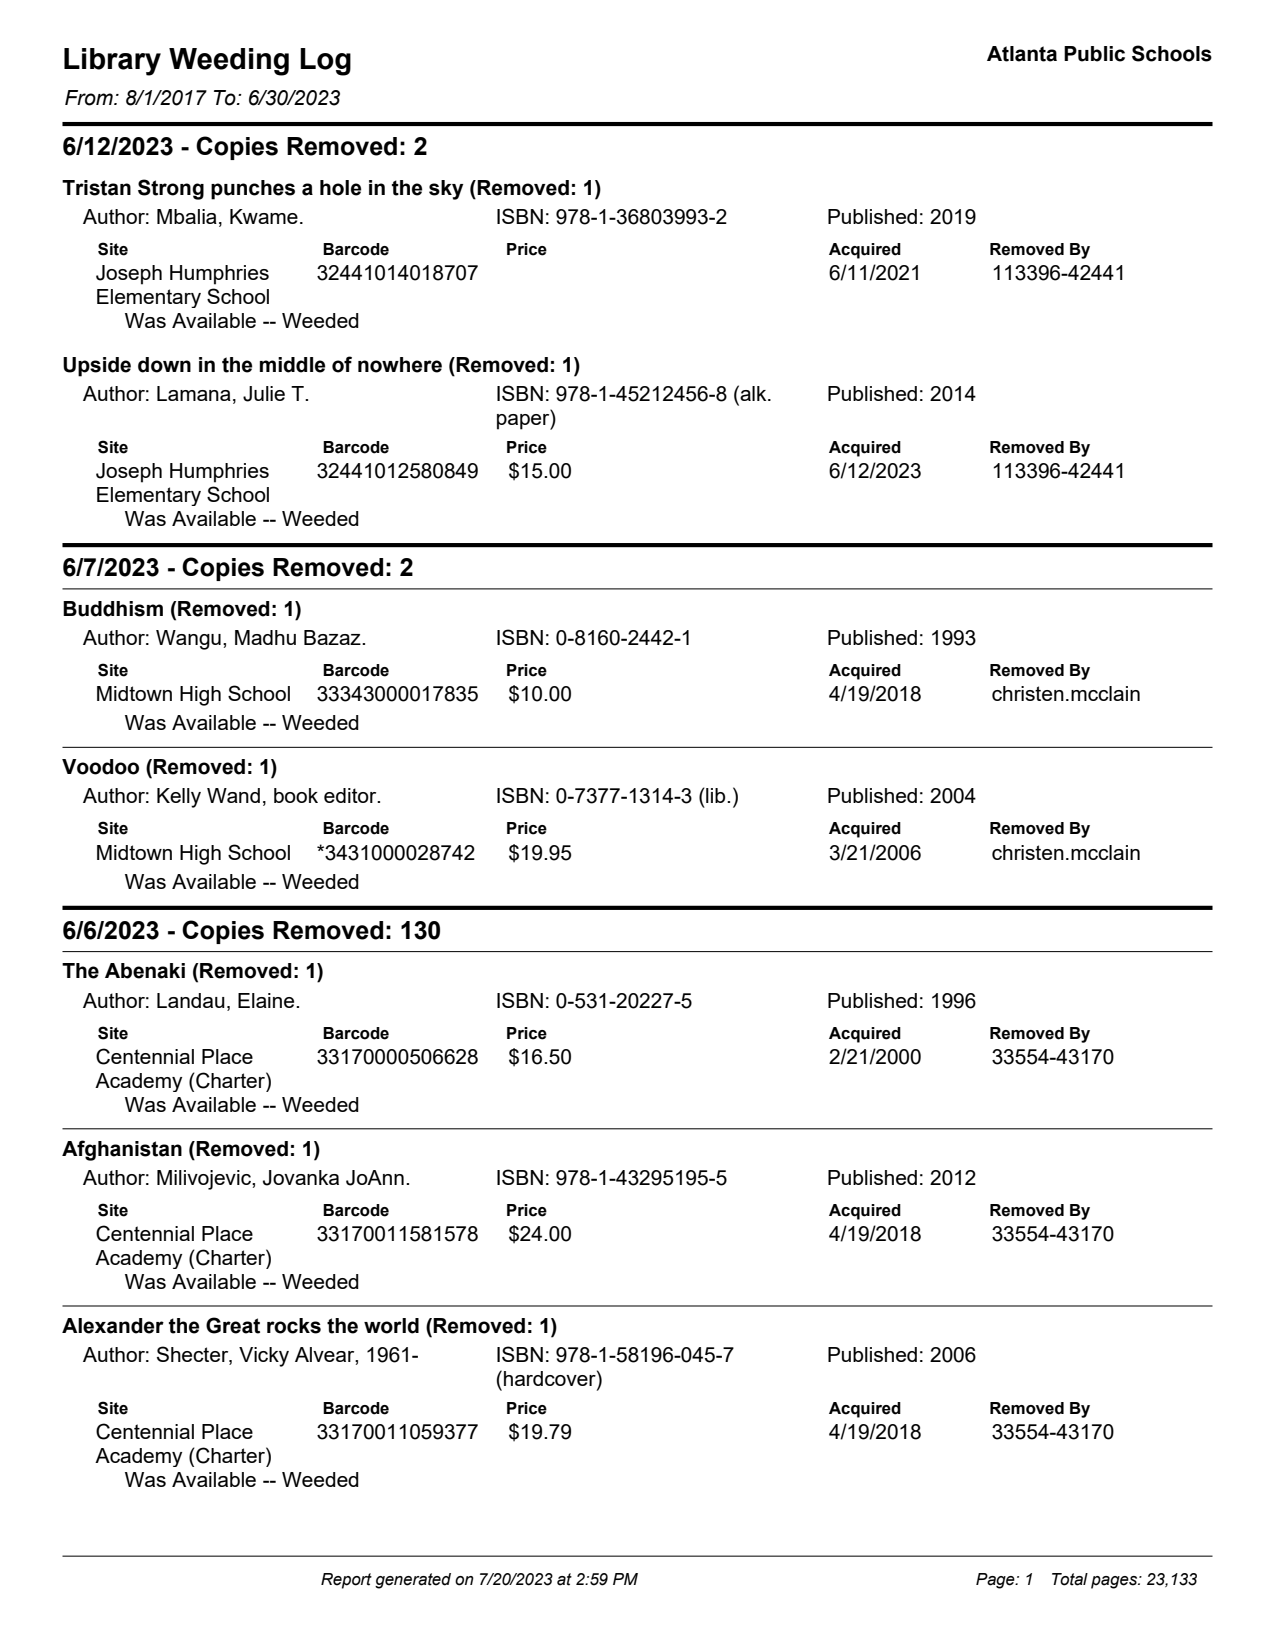

In [9]:
# Extract sections starting from each title
# This now directly returns an ElementCollection
title_sections = page.get_sections(
    start_elements=title_elements,
    include_boundaries='start'
)

# Show the title-based sections
page.clear_highlights()
title_sections.show()
page.show()

In [10]:
# Count the sections found
len(title_sections)

7

## Section Boundary Inclusion Options

In [11]:
# Use horizontal line elements as section dividers
dividers = page.find_all('line:horizontal')

# Compare the different boundary inclusion options
inclusion_options = {
    'none': page.get_sections(start_elements=dividers, include_boundaries='none'),
    'start': page.get_sections(start_elements=dividers, include_boundaries='start'),
    'end': page.get_sections(start_elements=dividers, include_boundaries='end'),
    'both': page.get_sections(start_elements=dividers, include_boundaries='both')
}

# Count sections with each option
section_counts = {option: len(sections) for option, sections in inclusion_options.items()}
section_counts

{'none': 9, 'start': 9, 'end': 9, 'both': 9}

## Custom Section Boundaries

Tristan Strong punches a hole in the sky (Removed: 1)
Author: Mbalia, Kwame. ISBN: 978-1-36803993-2 Published: 2019
Site Barcode Price Acquired Removed By
Joseph Humphries 32441014018707 6/11/2021 113396-42441
Elementary School
Was Available -- Weeded
Upside down in the middle of nowhere (Removed: 1)


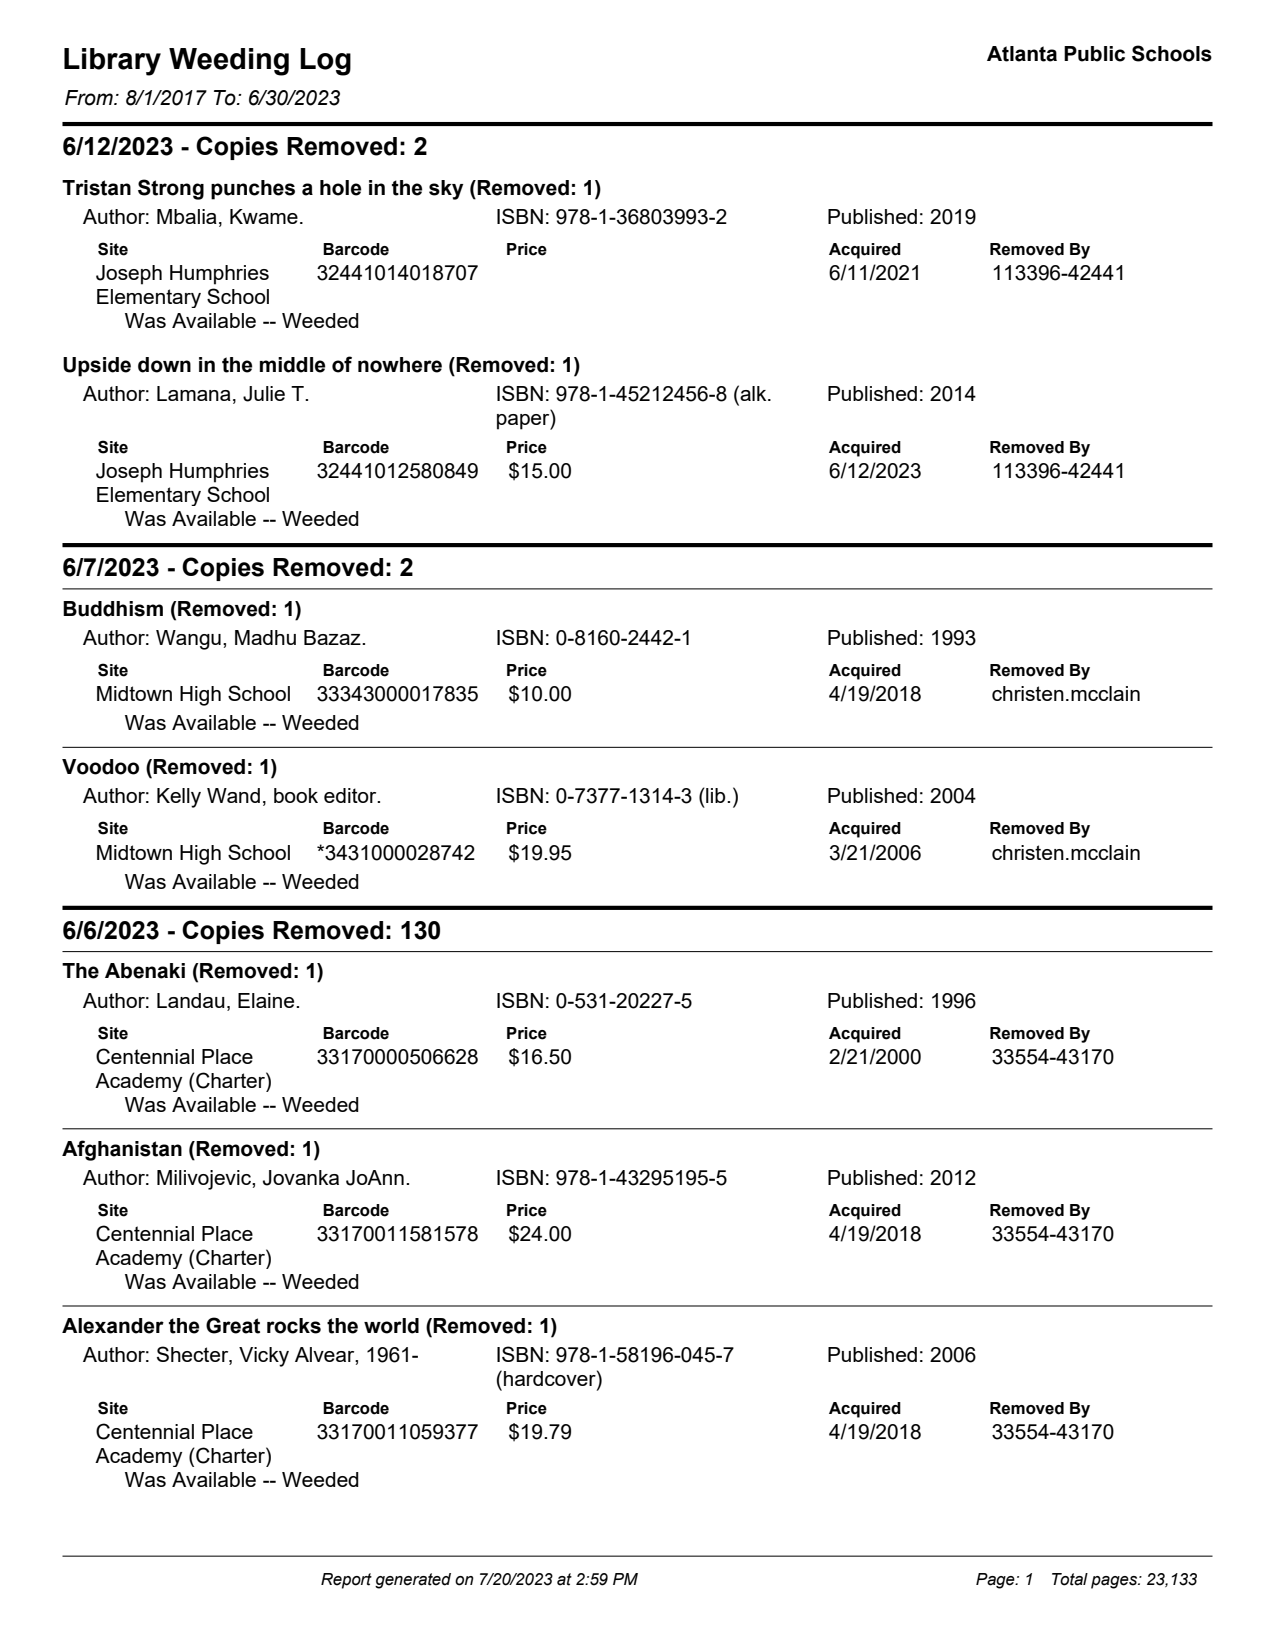

In [12]:
# Define specific start and end points - let's extract just one book entry
# We'll look for the first and second horizontal lines
page.clear_highlights()

start_point = title_elements[0]
end_point = title_elements[1]

# Extract the section between these points
single_book_entry = page.get_sections(
    start_elements=[start_point],
    end_elements=[end_point],
    include_boundaries='start'  # Include the start but not the end
)

# Visualize the custom section
single_book_entry.show(color="green", label="Single Book Entry")

print(single_book_entry[0].extract_text())

page.show()

## Multi-page Sections

In [13]:
# Get sections across the first two pages
multi_page_sections = [] # Initialize as a list

for page_num in range(min(2, len(pdf.pages))):
    page = pdf.pages[page_num]

    # Find horizontal lines on this page
    title_elements = page.find('line[width=2]').below().find_all('text[fontname="AAAAAB+font000000002a8d158a"][size=10]')

    # Get sections for this page (returns ElementCollection)
    page_sections = page.get_sections(
        start_elements=title_elements,
        include_boundaries='start'
    )

    # Add elements from the collection to our list
    multi_page_sections.extend(page_sections) # list.extend works with iterables like ElementCollection

# Display info about each section (showing first 3)
[{
    "page": section.page.number + 1,  # 1-indexed page number for display
    "text": section.extract_text()[:50] + "..." if len(section.extract_text()) > 50 else section.extract_text()
} for section in multi_page_sections]

[{'page': 2, 'text': 'Tristan Strong punches a hole in the sky (Removed:...'},
 {'page': 2, 'text': 'Upside down in the middle of nowhere (Removed: 1)\n...'},
 {'page': 2, 'text': 'Buddhism (Removed: 1)\nAuthor: Wangu, Madhu Bazaz. ...'},
 {'page': 2, 'text': 'Voodoo (Removed: 1)\nAuthor: Kelly Wand, book edito...'},
 {'page': 2, 'text': 'The Abenaki (Removed: 1)\nAuthor: Landau, Elaine. I...'},
 {'page': 2, 'text': 'Afghanistan (Removed: 1)\nAuthor: Milivojevic, Jova...'},
 {'page': 2, 'text': 'Alexander the Great rocks the world (Removed: 1)\nA...'},
 {'page': 3, 'text': 'The Anasazi (Removed: 1)\nAuthor: Petersen, David. ...'},
 {'page': 3, 'text': 'And then what happened, Paul Revere? (Removed: 1)\n...'},
 {'page': 3, 'text': 'The assassination of Martin Luther King Jr (Remove...'},
 {'page': 3, 'text': 'Barbara Jordan. (Removed: 1)\nAuthor: Wexler, Diane...'},
 {'page': 3, 'text': 'Bedtime for Batman (Removed: 1)\nAuthor: Dahl, Mich...'},
 {'page': 3, 'text': 'Benjamin O. Davis, J

## Building a Book Database

In [14]:
# Extract all book entries across multiple pages
book_database = []

# Process first 3 pages (or fewer if the document is shorter)
for page_num in range(min(3, len(pdf.pages))):
    page = pdf.pages[page_num]

    # Find horizontal lines on this page
    title_elements = page.find('line[width=2]').below().find_all('text[fontname="AAAAAB+font000000002a8d158a"][size=10]')

    # Get sections for this page
    book_sections = page.get_sections(
        start_elements=title_elements,
        include_boundaries='start'
    )

    # Process each book section
    for section in book_sections:
        # Skip sections that are too short (might be headers/footers)
        if len(section.extract_text()) < 50:
            continue

        # Extract book information
        book_info = {"page": page_num + 1}

        for field in ["Title:", "Author:", "ISBN:", "Publisher:", "Copyright:"]:
            field_element = section.find(f'text:contains("{field}")')
            if field_element:
                field_name = field.strip(':').lower()
                field_value = field_element.extract_text().replace(field, '').strip()
                book_info[field_name] = field_value

        # Below the field name
        for field in ["Price", "Acquired", "Barcode", "Removed By"]:
            field_element = section.find(f'text:contains("{field}")')
            if field_element:
                field_name = field.lower()
                field_value = field_element.below(height=10, width='element').expand(right=50).extract_text().strip()
                book_info[field_name] = field_value

        book_database.append(book_info)

# Display sample entries (first 3)
import pandas as pd

df = pd.json_normalize(book_database)
df.head()

page                    author                    isbn   price  \
0     1            Mbalia, Kwame.        978-1-36803993-2           
1     1          Lamana, Julie T.  978-1-45212456-8 (alk.  $15.00   
2     1       Wangu, Madhu Bazaz.           0-8160-2442-1  $10.00   
3     1  Kelly Wand, book editor.    0-7377-1314-3 (lib.)  $19.95   
4     1           Landau, Elaine.           0-531-20227-5  $16.50   

       acquired         barcode        removed by  
0  6/11/2021 11  32441014018707      113396-42441  
1  6/12/2023 11  32441012580849      113396-42441  
2  4/19/2018 ch  33343000017835  christen.mcclain  
3  3/21/2006 ch  *3431000028742  christen.mcclain  
4  2/21/2000 33  33170000506628       33554-43170

Section extraction lets you break down documents into logical parts, making it easier to generate summaries, extract specific content, and create structured data from semi-structured documents. In this example, we've shown how to convert a PDF library catalog into a structured book database.

## TODO

* Demonstrate using `page.init_search()` to pre-index all pages and retrieve section headings quickly.
* Add an example that merges multi-page sections by passing `new_section_on_page_break=False`.
* Include tips for detecting numbered headings ("1.", "2.") when ruling lines are absent.
* Provide a performance note on large PDFs and how to stream through pages lazily.